In [1]:
import pickle

with open("outputs/trajectory_data.pkl", "rb") as f:
    data = pickle.load(f)

track_history = data["track_history"]
vehicle_speeds = data["vehicle_speeds"]
fps = data["fps"]


In [2]:
import numpy as np
num_vehicles=len(vehicle_speeds)
avg_speed = np.mean(list(vehicle_speeds.values()))
std_speed = np.std(list(vehicle_speeds.values()))

print("Total tracked vehicles:", num_vehicles)
print("Average speed (px/sec):", round(avg_speed, 2))
print("Speed standard deviation:", round(std_speed, 2))

Total tracked vehicles: 52
Average speed (px/sec): 57.03
Speed standard deviation: 31.37


In [3]:
trajectory_lengths=[len(points) for points in track_history.values()]
print("Average trajectory length:", int(np.mean(trajectory_lengths)))
print("Min trajectory length:", min(trajectory_lengths))
print("Max trajectory length:", max(trajectory_lengths))

Average trajectory length: 62
Min trajectory length: 1
Max trajectory length: 192


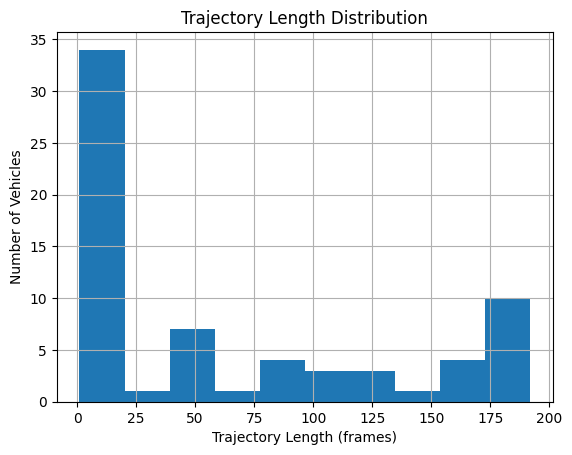

In [5]:
import matplotlib.pyplot as plt

plt.hist(trajectory_lengths, bins=10)
plt.xlabel("Trajectory Length (frames)")
plt.ylabel("Number of Vehicles")
plt.title("Trajectory Length Distribution")
plt.grid(True)
plt.show()


In [6]:
thresholds = [0.6, 0.7, 0.8, 0.9]
slow_vehicle_counts = []

mean_speed = np.mean(list(vehicle_speeds.values()))
std_speed = np.std(list(vehicle_speeds.values()))

for factor in thresholds:
    slow_threshold = mean_speed - factor * std_speed
    count = sum(1 for s in vehicle_speeds.values() if s < slow_threshold)
    slow_vehicle_counts.append(count)


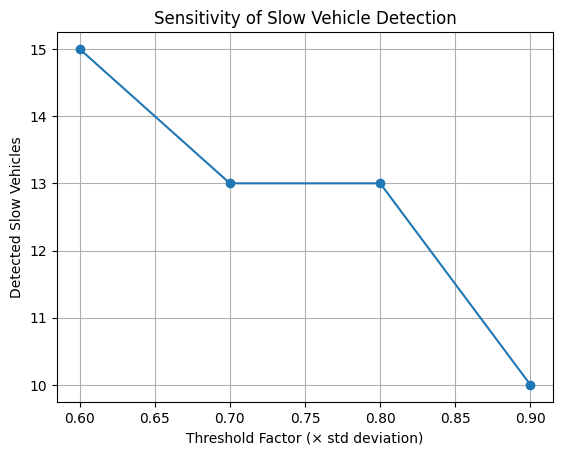

In [7]:
plt.plot(thresholds, slow_vehicle_counts, marker='o')
plt.xlabel("Threshold Factor (× std deviation)")
plt.ylabel("Detected Slow Vehicles")
plt.title("Sensitivity of Slow Vehicle Detection")
plt.grid(True)
plt.show()


## Limitations

- Speed is measured in pixel units and does not directly correspond to real-world velocity.
- Occlusions and close vehicle interactions may cause temporary ID switches.
- Behavior detection relies on heuristic thresholds rather than learned models.
- Camera calibration and perspective correction are not applied.


## Future Work

- Incorporate camera calibration to estimate real-world vehicle speeds.
- Extend behavior analysis to include lane change and collision risk detection.
- Integrate the pipeline into a real-time dashboard using Streamlit.
- Explore learning-based anomaly detection methods on trajectory features.
